# Z - score outlier detection and its removal - Feature Engineering - Day 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
184,7.78,33.0,0
337,6.95,68.0,0
365,7.07,25.0,0
2,7.54,40.0,1
788,6.54,19.0,0


C:\Users\panka\AppData\Local\Temp\ipykernel_17488\1287611413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inst

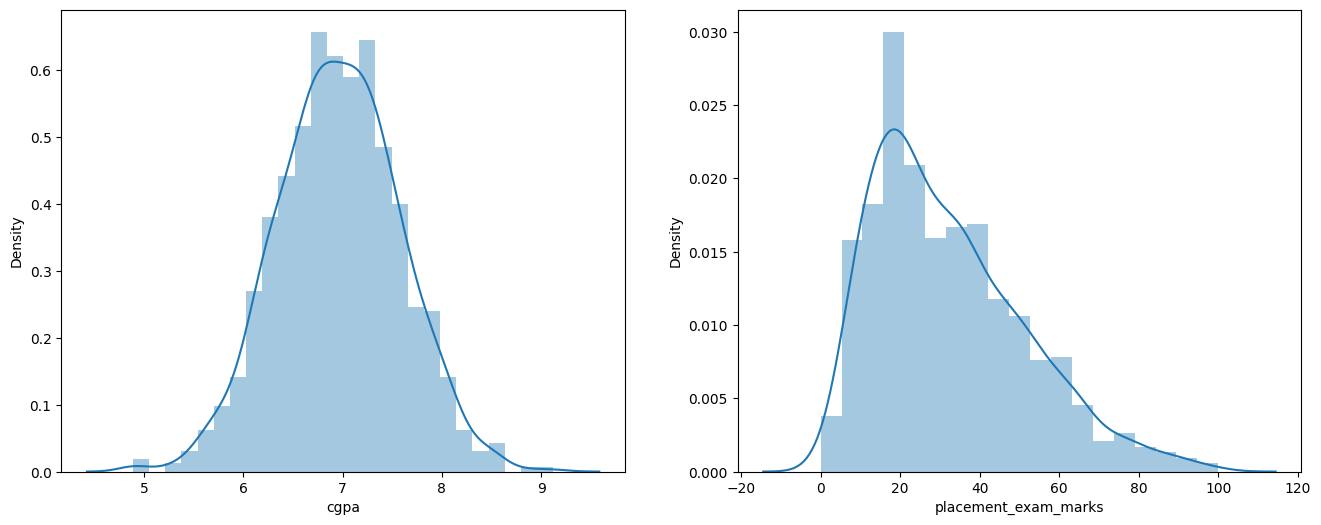

In [11]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [12]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [18]:
print("Mean value of CGPA :",df['cgpa'].mean())
print("Std value of CGPA :",df['cgpa'].std())
print("Min value of CGPA :",df['cgpa'].min())
print("Max value of CGPA :",df['cgpa'].max())

Mean value of CGPA : 6.96124
Std value of CGPA : 0.6158978751323896
Min value of CGPA : 4.89
Max value of CGPA : 9.12


In [23]:
# Finding the boundary or range[-3sigma,3sigma] values

print("Highest boundary value :",df['cgpa'].mean()+3*df['cgpa'].std())

print("Lowest boundary value :",df['cgpa'].mean()-3*df['cgpa'].std())

Highest boundary value : 8.808933625397168
Lowest boundary value : 5.113546374602832


In [25]:
# Finding outliers
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [30]:
# Approcah 1
# Trimming

df0=df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]
df0

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [32]:
# Approach 2
# calculation of Z-score

df['cgpa_Zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [33]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [35]:
df[df['cgpa_Zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [36]:
df[df['cgpa_Zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [37]:
df[(df['cgpa_Zscore'] > 3) | (df['cgpa_Zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [38]:
# Trimming 
new_df = df[(df['cgpa_Zscore'] < 3) & (df['cgpa_Zscore'] > -3)]

In [39]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [40]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [41]:
lower_limit

5.113546374602832

In [42]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [43]:
df.shape

(1000, 4)

In [44]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64